In [1]:
import numpy as np
import pandas as pd

import json

import matplotlib.pyplot as plt

import sklearn
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import scale, StandardScaler
from sklearn.metrics import confusion_matrix

In [2]:
raw_data = pd.read_json('yelp_academic_dataset_business.json', lines=True)
raw_data.head(3)


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'..."
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,...",None
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,None,"Pets, Pet Services, Pet Groomers",None


In [3]:
raw_data.drop(raw_data.columns[[0,1,2,3,4,5,6,7,9,10,13]], axis=1, inplace=True)

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209393 entries, 0 to 209392
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   stars       209393 non-null  float64
 1   attributes  180348 non-null  object 
 2   categories  208869 non-null  object 
dtypes: float64(1), object(2)
memory usage: 4.8+ MB


In [5]:
res_data = pd.DataFrame()

for i in range(0,len(raw_data)):
    if raw_data['categories'][i] and 'Restaurants' in raw_data['categories'][i]:
        res_data = res_data.append(raw_data.loc[i])
     
res_data.head()

,attributes,categories,stars
8,"{'RestaurantsAttire': 'u'casual'', 'Restaurant...","Ethnic Food, Food Trucks, Specialty Food, Impo...",4.5
20,"{'RestaurantsGoodForGroups': 'True', 'OutdoorS...","Food, Restaurants, Grocery, Middle Eastern",3.0
24,"{'RestaurantsTableService': 'False', 'Restaura...","Restaurants, Cheesesteaks, Poutineries",4.5
25,"{'GoodForKids': 'True', 'RestaurantsTakeOut': ...","Japanese, Fast Food, Food Court, Restaurants",4.5
30,"{'Ambience': '{'touristy': False, 'hipster': F...","Persian/Iranian, Turkish, Middle Eastern, Rest...",3.0


In [6]:
res_data = res_data.reset_index(drop=True)
res_data.shape

(63944, 3)

In [7]:
res_data['attributes'][1]

{'RestaurantsGoodForGroups': 'True',
 'OutdoorSeating': 'False',
 'BusinessAcceptsCreditCards': 'True',
 'RestaurantsTakeOut': 'True',
 'GoodForKids': 'True',
 'BusinessParking': "{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}",
 'RestaurantsPriceRange2': '1',
 'RestaurantsReservations': 'False',
 'RestaurantsAttire': "u'casual'"}

In [8]:
length = 0
loc = 0

for i in range(0, len(res_data)):
    if res_data['attributes'][i] and len(res_data['attributes'][i]) > length:
        length = len(res_data['attributes'][i])
        loc = i

res_data['attributes'][loc]

{'RestaurantsReservations': 'True',
 'BYOBCorkage': "'yes_free'",
 'RestaurantsDelivery': 'False',
 'RestaurantsTakeOut': 'True',
 'Corkage': 'False',
 'WiFi': "u'no'",
 'BusinessParking': "{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}",
 'RestaurantsAttire': "'casual'",
 'GoodForKids': 'True',
 'RestaurantsPriceRange2': '2',
 'Ambience': "{'romantic': False, 'intimate': False, 'touristy': False, 'hipster': False, 'divey': False, 'classy': False, 'trendy': False, 'upscale': False, 'casual': True}",
 'Caters': 'False',
 'BusinessAcceptsCreditCards': 'True',
 'OutdoorSeating': 'False',
 'RestaurantsGoodForGroups': 'True',
 'NoiseLevel': "u'average'",
 'GoodForMeal': "{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': True, 'brunch': False, 'breakfast': False}",
 'HasTV': 'True',
 'DietaryRestrictions': "{'dairy-free': True, 'gluten-free': False, 'vegan': True, 'kosher': False, 'halal': False, 'soy-free': False, 'vegetarian': True}",
 'B

In [9]:
attributes = ['Alcohol',
              'Ambience',
              'BikeParking',
              'BusinessParking',
              'DietaryRestrictions',
              'DogsAllowed',
              'GoodForKids',
              'HappyHour',
              'HasTV',
              'OutdoorSeating',
              'RestaurantsAttire',
              'RestaurantsPriceRange2',
              'RestaurantsReservations',
              'WiFi']

counter = 0
for i in range(0,len(res_data)):
    if res_data['attributes'][i]:
        attri = [i.split(':', 1)[0] for i in res_data['attributes'][i]]
        contain = [i for i in attri if i in attributes]
    
    if len(contain) == len (attributes):
            counter += 1

print("Number of restaurants containing all attributes:  ", counter)
print("Total Number of restaurants:  ", len(res_data))

Number of restaurants containing all attributes:   19
Total Number of restaurants:   63944


In [10]:
num_attri = [0]*len(attributes)
counter = 0

for i in range(0,len(res_data)):
    if res_data['attributes'][i]:
        attri = [i.split(':', 1)[0] for i in res_data['attributes'][i]]
    
    for j in range(0, len(attributes)):
        counter = 0
        contain = [i for i in attri if i in attributes[j]]
                
        if len(contain) != 0:
                counter += 1
                num_attri[j] = num_attri[j] + counter
                
print(num_attri)

[47811, 51691, 41662, 55037, 62, 10661, 53339, 13363, 50907, 52701, 50588, 55624, 54417, 44510]


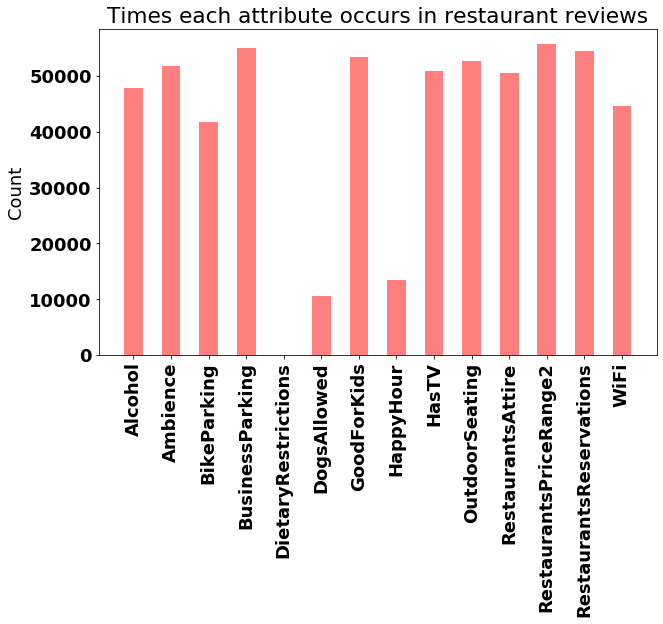

In [11]:
attributes2 = np.arange(len(attributes))

font = {'weight' : 'bold',
        'size'   : 18}
    
plt.rc('font', **font)
    
plt.figure(figsize=(10, 6))
plt.bar(attributes2, num_attri, align='center', alpha=0.5, width=0.5,color = 'red')
plt.xticks(attributes2, attributes, rotation='vertical')
plt.ylabel('Count')
plt.title('Times each attribute occurs in restaurant reviews')
 
plt.show()
plt.rcdefaults()

In [91]:
attributes = ['Alcohol',
              'BikeParking',
              'BusinessParking',
              'GoodForKids',
              'HasTV',
              'OutdoorSeating',
              'RestaurantsAttire',
              'RestaurantsPriceRange2',
              'RestaurantsReservations',
              'WiFi']


counter = 0
for i in range(0,len(res_data)):
    if res_data['attributes'][i]:
        attri = [i.split(':', 1)[0] for i in res_data['attributes'][i]]
        contain = [i for i in attri if i in attributes]
    
    if len(contain) == len (attributes):
            counter += 1

print("Number of restaurants containing all attributes:  ", counter)
print("Total Number of restaurants:  ", len(res_data))




Number of restaurants containing all attributes:   31733
Total Number of restaurants:   63944


In [92]:
res_data2 = pd.DataFrame()

counter = 0
for i in range(0,len(res_data)):
    if res_data['attributes'][i]:
        attri= [i.split(':', 1)[0] for i in res_data['attributes'][i]]
        contain = [i for i in attri if i in attributes]
    
    if len(contain) == len (attributes):
            counter += 1
            res_data2 = res_data2.append(res_data.loc[i])

print("Number of restaurants containing all attributes:  ", counter)
print("Total Number of restaurants:  ", len(res_data2))
res_data2.head()

Number of restaurants containing all attributes:   31733
Total Number of restaurants:   31733


,attributes,categories,stars
6,"{'Alcohol': 'u'none'', 'WiFi': 'u'no'', 'GoodF...","Mexican, Restaurants, Fast Food",2.5
15,"{'Alcohol': 'u'none'', 'GoodForKids': 'True', ...","Shopping Centers, Food, Coffee & Tea, Cafes, M...",3.0
17,"{'RestaurantsReservations': 'False', 'Restaura...","Fast Food, American (New), Restaurants, Burgers",4.0
18,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Restaurants, Pizza",4.0
19,"{'RestaurantsTakeOut': 'True', 'Alcohol': 'u'b...","Vietnamese, Restaurants",4.0


In [287]:
res_data2 = res_data2.reset_index(drop=True)   

attributes = ['Alcohol',
              'BikeParking',
              'BusinessParking',
              'GoodForKids',
              'HasTV',
              'OutdoorSeating',
              'RestaurantsAttire',
              'RestaurantsPriceRange2',
              'RestaurantsReservations',
              'WiFi']

#with open(r'C:\Users\Claire Dong\235 Naive Bayes\File Name.json') as f:
#        data = json.load(f)

        
tmp_data = {}
for value in attributes:
    tmp_data[value] = []
 
for k in list(res_data2['attributes'].keys()):
    for value in attributes:
        try:
            tmp_data[value].append(res_data2['attributes'][k][value])
        except TypeError:
            tmp_data[value].append('tmp')
        except KeyError:
            try:
                tmp_data[value].append(res_data2['attributes'][k]['Ambience'][value])
            except TypeError:
                tmp_data[value].append('tmp')         
 

td = pd.DataFrame.from_dict(tmp_data)
td.head(100)


td.shape

(31733, 10)

In [288]:
td = pd.concat([res_data2, td], axis=1, join='inner')
for k in list(tmp_data.keys()):
    td=td[~td[k].isin(['tmp'])]

td = td.reset_index(drop=True)  

td.shape


(30880, 13)

In [296]:
newFeatures = pd.DataFrame(0, index=np.arange(len(td)), columns=attributes)

for i in range(0,len(td)):
    
    '''   if td['attributes'][i]:
        attri = [i.split(':', 1) for i in td['attributes'][i]
    '''   
    # Alcohol
    if 'none' not in td['Alcohol'][i]:
        newFeatures.at[i,'Alcohol'] = 1
        
   
    # Bike Parking
    if 'False' != td['BikeParking'][i]:
        newFeatures.at[i,'BikeParking'] = 1
    
    # BusinessParking
    if  "'garage': False, 'street': False" in td['BusinessParking'][i]:
        newFeatures.at[i,'BusinessParking'] = 1
    
    # Good for kids
    if 'False' not in td['GoodForKids'][i]: 
        newFeatures.at[i,'GoodForKids'] = 1
    
    # Has TV
    if 'False' not in td['HasTV'][i]:  
        newFeatures.at[i,'HasTV'] = 1
      
    # Outdoor seating
    if 'False' not in td['OutdoorSeating'][i]: 
        newFeatures.at[i,'OutdoorSeating'] = 1
        
    # Restaurant Attire
    if 'casual' not in td['RestaurantsAttire'][i]: 
        newFeatures.at[i,'RestaurantsAttire'] = 1
        
 
    # Reservations
    if 'False' not in td['RestaurantsReservations'][i]: 
        newFeatures.at[i,'RestaurantsReservations'] = 1
        
    # WiFi
    if 'no' not in td['WiFi'][i]: 
        newFeatures.at[i,'WiFi'] = 1
    
    
''' # Price Range
    price = td['RestaurantsPriceRange2'][i] 
    nF.at[i,'RestaurantsPriceRange2'] = price
''' 
'''   
    # Ambience
    
    if 'romantic' in attri:
        if 'romantic: False' not in attri:
            nF.at[i,'ambRomantic'] = 1
    
    if 'intimate' in attri:
        if 'intimate: False' not in ambSplit:
            nF.at[i,'ambIntimate'] = 1
    
    if 'classy' in attri:   
        if 'classy: False' not in ambSplit:
            nF.at[i,'ambClassy'] = 1

    if 'hipster' in attri:
        if 'hipster: False' not in ambSplit:
            nF.at[i,'ambHipster'] = 1
    
    if 'divey' in attri:    
        if 'divey: False' not in ambSplit:
            nF.at[i,'ambDivey'] = 1
        
    if 'touristy' in attri: 
        if 'touristy: False' not in ambSplit:
            nF.at[i,'ambTouristy'] = 1
        
    if 'trendy' in attri:    
        if 'trendy: False' not in ambSplit:
            nF.at[i,'ambTrendy'] = 1
    
    if 'upscale' in attri:    
        if 'upscale: False' not in ambSplit:
            nF.at[i,'ambUpscale'] = 1
    
    if 'casual' in attri:    
        if 'casual: False' not in ambSplit:
            nF.at[i,'ambCasual'] = 1
'''   

newFeatures.head(10)

,Alcohol,BikeParking,BusinessParking,GoodForKids,HasTV,OutdoorSeating,RestaurantsAttire,RestaurantsPriceRange2,RestaurantsReservations,WiFi
0,0,1,1,1,0,0,0,0,0,0
1,0,0,1,1,1,1,1,0,0,0
2,0,1,1,1,0,1,0,0,0,0
3,0,1,1,1,1,0,0,0,1,0
4,1,1,0,1,1,0,0,0,0,0
5,0,1,1,1,1,0,0,0,0,0
6,1,1,0,1,1,1,0,0,1,1
7,0,0,1,1,1,0,0,0,0,0
8,0,1,1,1,1,1,0,0,0,0
9,0,1,0,1,0,0,0,0,0,0


In [297]:
res_data3 = td.drop('Alcohol', axis=1)
res_data3 = res_data3.drop('BikeParking', axis=1)
res_data3 = res_data3.drop('BusinessParking', axis=1)
res_data3 = res_data3.drop('GoodForKids', axis=1)
res_data3 = res_data3.drop('HasTV', axis=1)
res_data3 = res_data3.drop('OutdoorSeating', axis=1)
res_data3 = res_data3.drop('RestaurantsAttire', axis=1)
res_data3 = res_data3.drop('RestaurantsPriceRange2', axis=1)
res_data3 = res_data3.drop('RestaurantsReservations', axis=1)
res_data3 = res_data3.drop('WiFi', axis=1)

res_data3 = pd.concat([res_data3, newFeatures], axis=1, join='inner')
res_data3 = res_data3.drop('attributes', axis=1)
res_data3 = res_data3.drop('categories', axis=1)
res_data3 = res_data3.drop('RestaurantsPriceRange2', axis=1)
res_data3 = pd.concat([res_data3,td['RestaurantsPriceRange2']], axis=1, join='inner')
res_data3.head(100)

,stars,Alcohol,BikeParking,BusinessParking,GoodForKids,HasTV,OutdoorSeating,RestaurantsAttire,RestaurantsReservations,WiFi,RestaurantsPriceRange2
0,2.5,0,1,1,1,0,0,0,0,0,1
1,3.0,0,0,1,1,1,1,1,0,0,4
2,4.0,0,1,1,1,0,1,0,0,0,2
3,4.0,0,1,1,1,1,0,0,1,0,1
4,4.0,1,1,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
95,4.0,0,1,0,1,1,0,0,0,0,1
96,3.5,1,1,0,1,1,0,0,0,0,2
97,3.5,0,0,0,1,1,0,0,1,0,2
98,2.5,1,1,1,1,1,1,0,0,0,2


In [301]:
for i in range(0,len(res_data3)):
    if res_data3['stars'][i] >= 4:
        res_data3.at[i,'stars'] = 1
    else: 
        res_data3.at[i,'stars'] = 0

print("Number of restaurats classified as greater than or equal to 4 stars (1):  ",
      len(res_data3[(res_data3['stars'] > 0)]))

print("Number of restaurats classified as less than or equal to 3 stars (0):  ",
      len(res_data3[(res_data3['stars'] == 0)]))

Number of restaurats classified as greater than or equal to 4 stars (1):   12748
Number of restaurats classified as less than or equal to 3 stars (0):   18132


In [375]:
res_data4 = res_data3.drop(['RestaurantsPriceRange2'], axis=1)
res_data4.head(100)

,stars,Alcohol,BikeParking,BusinessParking,GoodForKids,HasTV,OutdoorSeating,RestaurantsAttire,RestaurantsReservations,WiFi
0,0.0,0,1,1,1,0,0,0,0,0
1,0.0,0,0,1,1,1,1,1,0,0
2,1.0,0,1,1,1,0,1,0,0,0
3,1.0,0,1,1,1,1,0,0,1,0
4,1.0,1,1,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
95,1.0,0,1,0,1,1,0,0,0,0
96,0.0,1,1,0,1,1,0,0,0,0
97,0.0,0,0,0,1,1,0,0,1,0
98,0.0,1,1,1,1,1,1,0,0,0


In [312]:
X = res_data3.drop(['stars'], axis=1)
X = X.drop(['RestaurantsPriceRange2'], axis=1)
Y = res_data3['stars']
X.head(100)


,Alcohol,BikeParking,BusinessParking,GoodForKids,HasTV,OutdoorSeating,RestaurantsAttire,RestaurantsReservations,WiFi
0,0,1,1,1,0,0,0,0,0
1,0,0,1,1,1,1,1,0,0
2,0,1,1,1,0,1,0,0,0
3,0,1,1,1,1,0,0,1,0
4,1,1,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
95,0,1,0,1,1,0,0,0,0
96,1,1,0,1,1,0,0,0,0
97,0,0,0,1,1,0,0,1,0
98,1,1,1,1,1,1,0,0,0


In [322]:
BernNB = BernoulliNB(binarize = True)
BernNB.fit(X_train,Y_train)
print(BernNB)

Y_pred = BernNB.predict(X_test)
print (accuracy_score(Y_test,Y_pred))

BernoulliNB(alpha=1.0, binarize=True, class_prior=None, fit_prior=True)
0.5483870967741935


In [317]:
MultiNB = MultinomialNB()
MultiNB.fit(X_train,Y_train)
print(MultiNB)

Y_pred = MultiNB.predict(X_test)
print (accuracy_score(Y_test,Y_pred))

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
0.586890393484447


In [318]:
GausNB = GaussianNB()
GausNB.fit(X_train,Y_train)
print(GausNB)

Y_pred = GausNB.predict(X_test)
print (accuracy_score(Y_test,Y_pred))

GaussianNB(priors=None, var_smoothing=1e-09)
0.5989598665489158


In [376]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = .1,random_state = 42)


In [362]:
def NaiveBayesTrain(trainX,trainY):
    P_x_1 = []
    P_x_0 = []
    count_j_1 = 0
    count_j_0 = 0
    
    P_all_1 = []
    P_all_0 = []
   
    for i in range(len(trainX)):
        if trainY[i] == 1:
                P_x_1.append(trainX[i]) 
        if trainY[i] == 0:
                P_x_0.append(trainX[i]) 
    for j in range(len(trainX.T)):
        for i in range(len(P_x_1)):
            if P_x_1[i][j] == 1:
                count_j_1 += 1
        P_j_1 = count_j_1/len(P_x_1)
        
        for i in range(len(P_x_0)):
            if P_x_0[i][j] == 1:
                count_j_0 += 1
        P_j_0 = count_j_0/len(P_x_0)
        
        P_all_1.append(P_j_1)
        P_all_0.append(P_j_0)
        
    P_1 = len(P_x_1)/len(P_x_0)
    
    return P_all_1,P_all_0,P_1
            
            

In [365]:
def NaiveBayesTest(trainX,trainY,testX):
    P_all_1,P_all_0,P_1 = NaiveBayesTrain(trainX,trainY)
    log_all_j = 0
    class_all = []
    for i in range(len(testX)):
        for j in range(len(testX.T)):
            if testX[i][j] == 1:
                log_all_j += np.log(P_all_1[j]/P_all_0[j])
            if testX[i][j] == 0:
                log_all_j += np.log((1-P_all_1[j])/(1-P_all_0[j]))
        log_all = log_all_j + np.log(P_1/(1-P_1))
        if log_all > 0:
            class_i = 1
        else:
                class_i = 0
        class_all.append(class_i)
    
    return class_all
                                    
        

In [378]:
X_train,X_test,Y_train,Y_test = X_train.values,X_test.values,Y_train.values,Y_test.values  #convert dataframe to array
Y_train = np.expand_dims(Y_train, axis=0)
Y_train = Y_train.T
Y_test = np.expand_dims(Y_test, axis=0)
Y_test = Y_test.T
print(Y_test.shape)

(3088, 1)


In [350]:
print(Y_train.shape)

(29336, 1)


In [379]:
Y_pred = NaiveBayesTest(X_train,Y_train,X_test)
print (accuracy_score(Y_test,Y_pred))



0.5893782383419689


In [260]:
res_data3.to_json(r'C:\Users\Claire Dong\235 Naive Bayes\res_data3.json')

In [57]:
with open(r'C:\Users\Claire Dong\235 Naive Bayes\File Name.json') as f:
        data = json.load(f)
print(data["attributes"]["0"])


{'Alcohol': "u'none'", 'WiFi': "u'no'", 'GoodForKids': 'True', 'RestaurantsDelivery': 'False', 'RestaurantsReservations': 'False', 'OutdoorSeating': 'False', 'RestaurantsGoodForGroups': 'True', 'RestaurantsTakeOut': 'True', 'BusinessAcceptsCreditCards': 'True', 'Caters': 'False', 'HasTV': 'False', 'BikeParking': 'True', 'Ambience': "{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'divey': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': True}", 'RestaurantsAttire': "u'casual'", 'RestaurantsPriceRange2': '1', 'NoiseLevel': "u'average'", 'BusinessParking': "{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}"}
